In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Log_reg.csv")

In [3]:
df.head()

,Attribute 1,Attribute 2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df['Target'].value_counts()

Target
1    60
0    40
Name: count, dtype: int64

In [5]:
list(X.columns)
from sklearn import preprocessing
X1 = preprocessing.scale(X)

NameError: name 'X' is not defined

In [7]:
class Logistic_Regression:
    
    def __init__(self, w1, w2, b):
        self.w1 = w1
        self.w2 = w2
        self.b = b
        self.loss_list = []
        self.w1_list = []
        self.w2_list = []
        self.b_list = []
        self.y_pred_list = []
        
    def cost_function(self, target, attribute1, attribute2):
        cost = 0
        m = len(target)
        
        for y_actual, x1, x2 in zip(target, attribute1, attribute2):
            if (1 - self.sigmoid(x1, x2)) > 0 and self.sigmoid(x1, x2) > 0:
                cost += (y_actual * math.log(self.sigmoid(x1, x2))) + ((1 - y_actual) * math.log(1 - self.sigmoid(x1, x2)))
            elif (1 - self.sigmoid(x1, x2)) < 0 and self.sigmoid(x1, x2) > 0:
                cost += (y_actual * math.log(self.sigmoid(x1, x2)))
            elif (1 - self.sigmoid(x1, x2)) > 0 and self.sigmoid(x1, x2) < 0:
                cost += ((1 - y_actual) * math.log(1 - self.sigmoid(x1, x2)))
        
        cost_function = -(1 / m) * cost
        self.loss_list.append(cost_function)
        
        # print("Loss :", cost_function)    
        
    def linear_eqn(self, x1, x2):
        y = self.w1 * x1 + self.w2 * x2 + self.b
        return y
    
    def sigmoid(self, x1, x2):
        y = self.linear_eqn(x1, x2)
        
        
        y_pred = 1 / (1+ np.exp(-y))
        
        
        return y_pred
    
    def weights(self, alpha, target, attribute1, attribute2, iters):
        
        error1 = 0
        error2 = 0
        error3 = 0
        m = len(target)
        
        w1 = self.w1
        w2 = self.w2
        b  = self.b
        
        
        
        while iters != 0:
            
            for y_actual, x1, x2 in zip(target, attribute1, attribute2):
                y_pred = self.sigmoid(x1, x2)
            
                w1 = w1 + (alpha  * (y_actual - y_pred ) * x1 )/m
                w2 = w2 + (alpha  * (y_actual - y_pred ) * x2 )/m
                b = b + (alpha  * (y_actual - y_pred ) )/m
        
                self.w1_list.append(w1)
                self.w2_list.append(w2)
                self.b_list.append(b)

                self.w1 = w1
                self.w2 = w2
                self.b  = b
            # old_loss = loss
            loss = self.cost_function(target, attribute1, attribute2)
            iters -= 1
    
    def custom_compile(self, X, y, iters = 100, alpha = 0.1):
        target = y
        attribute1 = X['Attribute 1']
        attribute2 = X['Attribute 2']
        
        
        self.weights( alpha, target, attribute1, attribute2, iters)
        
    def accuracy(self, y_actual, X):
        m = len(y_actual)
        correct = 0
        
        for x1, x2 in zip(X['Attribute 1'], X['Attribute 2']):
            y_pred = self.sigmoid(x1, x2)
            self.y_pred_list.append(y_pred)
            
        for i,j in zip(y_actual, self.y_pred_list):
            if i == j:
                correct += 1

        print("Accuracy :", correct/m)
        return correct/m
    
    def predict(self, X):
        attribute1 = X['Attribute 1']
        attribute2 = X['Attribute 2']

        prediction1 = []

        for  x1, x2 in zip( attribute1, attribute2):
            pred1 = round(1/(1+np.exp(-(obj.b+obj.w1*x1 + obj.w2*x2))))
            prediction1.append(pred1)
        
        return prediction1

In [10]:
obj = Logistic_Regression(0, 0, 0)


y = df['Target']
X = df.drop('Target', axis = 1)


obj.custom_compile(X[:30], y[:30], 100000, alpha = 0.01)

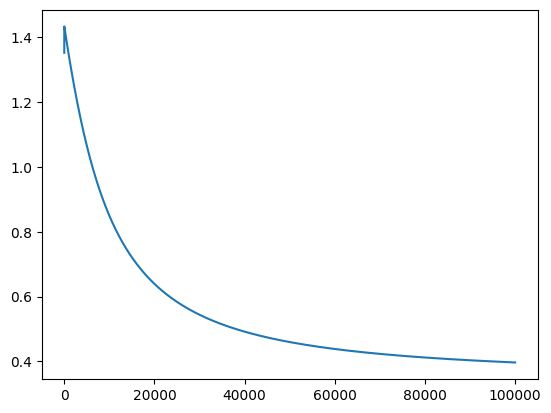

In [11]:
plt.plot(obj.loss_list)
# plt.plot(obj.w1_list)
# plt.plot(obj.w2_list)
plt.show()

In [13]:
attribute1 = X['Attribute 1']
attribute2 = X['Attribute 2']

prediction1 = []

for  x1, x2 in zip( attribute1, attribute2):
    pred1=round(1/(1+np.exp(-(obj.b+obj.w1*x1 + obj.w2*x2))))
    prediction1.append(pred1)

# for i in range(len(prediction1)):
#     prediction1[i]=round(prediction1[i])
prediction1

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1]

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,prediction1))

0.84


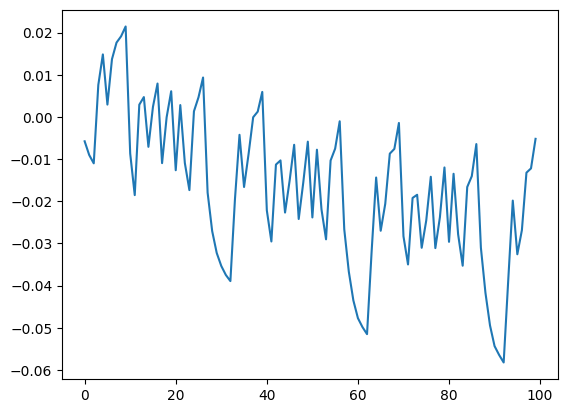

In [26]:


plt.plot(obj.w1_list[:100])
# plt.plot(obj.w1_list)
# plt.plot(obj.w2_list)
plt.show()